<h3>Кубическая норма

In [1]:
# Дальше будет использоваться для определения нормы Якобиана
def cubic_norm(A):
    x = 0
    sum = 0
    for i in range(len(A)):
        sum = 0
        for j in range(len(A[i])):
            sum += abs(A[i][j])
        if sum > x:
            x = sum
    return x


<h3>Создание пустой матрицы</h3>

In [2]:
# Используется для решения СЛАУ
def create_matrix(x, y):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*y)
    return A


<h3>Создание единичной матрицы</h3>

In [3]:
# Используется для решения СЛАУ
def create_I_matrix(x):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*x)
        A[i][i] = 1
    return A


<h3> Произведение матриц </h3>

In [4]:
# Используется для решения СЛАУ
def matrix_product(A, B):
    n = len(A)
    m = len(B[0])
    R = create_matrix(n, m)
    for i in range(n):
        for j in range(m):
            for k in range(n):
                R[i][j] += A[i][k] * B[k][j]
    return R


<h3>Решение системы ЛУ при треугольных матрицах

In [5]:
# Используется для решения СЛАУ
def solution(A, q, b):
    # q определяет A - это нижняя треугольная матрица или верхняя
    n = len(A)
    x = []
    if q:
        for i in range(n):
            x.append([0] * len(b[i]))
            for k in range(len(b[i])):
                for j in range(i+1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    else:
        for i in range(n):
            x.append([0] * len(b[i]))
        for i in range(n-1, -1, -1):
            for k in range(len(b[i])):
                for j in range(n-1, i-1, -1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    return x


<h2>LU разложение</h2>

In [6]:
# Используется для решения СЛАУ
def LU(A):  # Собственно реализация LU разложения
    U = []
    for i in A:
        U.append(i.copy())
    n = len(A)
    L = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            # Выбор главного элемента
            m = j
            for k in range(j+1, n):
                if U[i][k] > U[i][m]:
                    m = k
            if m != j:
                for k in range(n):
                    x = U[i][m]
                    U[i][m] = U[i][j]
                    U[i][j] = x

            U[0][i] = A[0][i]
            L[i][0] = A[i][0] / U[0][0]
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum
            if (i > j):
                L[j][i] = 0
            else:
                sum = 0
                for k in range(i):
                    sum += L[j][k] * U[k][i]
                L[j][i] = (A[j][i] - sum) / U[i][i]
    return L, U


<h1>TEST

In [7]:
from math import cos, sin, asin
def f(x,y):
    return 0.8-cos(y-1)
def g(x,y):
    return 2+cos(x)
def F(x,y):
    return f(x,y)**2+g(x,y)**2

def ff(x):
    return cos(x)-1.2
def gg(x):
    try:
        return asin(2*x-2)+0.5
    except:
        return None

def jacobian(x,y):
    A = [[0, sin(y-1)], 
         [-sin(x), 0]]
    return cubic_norm(A)
def fsh(x,y):
    return sin(y-1)

def gsh(x,y):
    return -sin(x)




x0 = 0.9
y0 = 2.6
e = 10 **(-10)

<h2> Вариант 24

In [8]:
from math import cos, sin, asin, acos, pi
# Начальные значения и точность
x0, y0 = 1.1, 0.8
e = 10 **(-12)
arr1 = 0.5
arr2 = 1.5
q = -1
xid, yid = 1.1388173974691207, 0.7813312360330628
var_newton = """Вариант 24

x0 = 1.139  y0 = 0.78

Метод Ньютона

Матрица производных
-sin(x),        1
    2,     -cos(y-0.5)
Itr           x                   y               Норма невязки                    F1                              F2"""
var_sim_it = """
 Метод простой итерации 
 Fi1(x,y)=cos(x)+y-1.2
 Fi2(x,y)=2*x-sin(y-0.5)-2
 Якобиан 
|-sin(x)     1      |
|   2    -cos(y-0.5)|

Значение 
|-0.9080723847057184           1        |
|        2           -0.9606406373319826|
Norma={}

Itr             x                y               Норма невязки            Погрешность             Норма якобиана""".format(jacobian(x0,y0))
# Основные функции f & g
def f(x,y):
    return cos(x)+y-1.2
def g(x,y):
    return 2*x-sin(y-0.5)-2
# F для метода градиентного спуска
def F(x,y):
    return f(x,y)**2+g(x,y)**2
# преобразованные функции для графиков
def ff(x):
    return 1.2 - cos(x)
def gg(x):
    return 1 + sin(x-0.5) / 2
# Собственно, Якобиан
def jac(x,y):
    return [[2, -cos(y-0.5)],[-sin(x), 1]]
def jacobian(x,y):
    return cubic_norm(jac(x,y))
# Функции для преобразования x & y
def pfix(x,y):
    return sin(y-0.5)/2 +1
def pfiy(x,y):
    return 1.2-cos(x)
def Fsh_x(x,y):
    return -2*sin(x)*cos(x)-2*y*sin(x)+2.4*sin(x)-4*sin(y-0.5)+8*x-8
def Fsh_y(x,y):
    return 2*cos(x)+2*y-2.4+cos(y-0.5)*(-4*x+4+2*sin(y-0.5))



<h2> Вариант 25

In [9]:
from math import cos, sin

# Начальные значения и точность
x0, y0 = -0.1, -1
e = 10 **(-12)
arr1 = -1
arr2 = 0
q = 1
xid, yid = -0.13355832611734098, -0.8665808075387158
var_newton = """Вариант 25

x0 = -0.13   y0 = -0.9

Метод Ньютона

Матрица производных
    1   -sin(y+0.5) 
cos(x)      -2
Itr           x                   y               Норма невязки                    F1                              F2"""
var_sim_it = """
 Метод простой итерации 
 Fi1(x,y)=cos(y+0.5)+x-0.8
 Fi2(x,y)=sin(x)-2*y-1.6
 Якобиан 
  1     -sin(y+0.5) 
cos(x)      -2

Значение 
|        1           0.3894183423086505|
|0.9915618937147881          -2        |
Norma={}

Itr             x                y               Норма невязки            Погрешность             Норма якобиана""".format(jacobian(x0,y0))
# Основные функции f & g
def g(x,y):
    return cos(y+0.5)+x-0.8
def f(x,y):
    return sin(x)-2*y-1.6
# F для метода градиентного спуска
def F(x,y):
    return f(x,y)**2+g(x,y)**2
# преобразованные функции для графиков
def gg(x):
    return 0.8 - cos(x+0.5)
def ff(x):
    return (sin(x)-1.6)/2
    
# Собственно, Якобиан
def jac(x,y):
    return [[1, -sin(y+0.5)], [cos(x), -2]]
def jacobian(x,y):
    return cubic_norm(jac(x,y))
# Функции для преобразования x & y
def pfix(x,y):
    return (0.8 - cos(y + 0.5))
def pfiy(x,y):
    return (sin(x) / 2 - 0.8)
def Fsh_x(x,y):
    return 2*cos(y+0.5)+2*x-1.6+ cos(x)*(2*sin(x)-4*y-3.2)
def Fsh_y(x,y):
    return 2*sin(y+0.5)*(-cos(y+0.5)-2*x+1.6)-4*sin(x)+8*y+6.4
jac(x0,y0)

[[1, 0.479425538604203], [0.9950041652780258, -2]]

<h1>Метод Ньютона

In [10]:
from math import sqrt
def b(x,y):
    return [[g(x,y)], [f(x,y)]]

print(var_newton)

e = 10 **(-12)
x,y = x0,y0
prevf, prevg = 0, 0
i = 0
while  sqrt((prevf - f(x,y))**2 + (prevg - g(x,y))**2) >= e:
    prevf, prevg = f(x,y), g(x,y)
    i += 1
    w = jac(x,y)
    L,U = LU(w)
    Y = solution(L, True, b(x,y))
    X = solution(U, False, Y)
    x -= X[0][0]
    y -= X[1][0]
    print("""{:<3}|{:<20}|{:<20}||{:<25}|{:<25}|{:<25}|""".format(i, x, y, sqrt((prevf - f(x,y))**2 + (prevg - g(x,y))**2), f(x,y),  g(x,y)))
x_new, y_new = x,y

Вариант 25

x0 = -0.13   y0 = -0.9

Метод Ньютона

Матрица производных
    1   -sin(y+0.5) 
cos(x)      -2
Itr           x                   y               Норма невязки                    F1                              F2
1  |-0.13999654156920183|-0.8698150710524499 ||0.30044162784820394      |9.045205499602638e-05    |-0.00760233874449634     |
2  |-0.13356202767837771|-0.8665840641810488 ||0.0075979749850457485    |2.8447019271293783e-06   |-4.868848203942733e-06   |
3  |-0.13355832610760107|-0.8665808075280806 ||5.638967856914794e-06    |9.121592370320286e-13    |-4.950484466803573e-12   |
4  |-0.13355832610353607|-0.8665808075256102 ||5.033818722378301e-12    |0.0                      |0.0                      |
5  |-0.13355832610353607|-0.8665808075256102 ||0.0                      |0.0                      |0.0                      |


<h1>Метод простой итерации

In [11]:
from math import sqrt
def q(x,y):
    return (pfix(x,y), pfiy(x,y))
e = 10 **(-4)
prevf, prevg =  0, 0
x, y = q(x0, y0)

print(var_sim_it)
i = 0

while sqrt((prevf - f(x,y))**2 + (prevg - g(x,y))**2) >= e:
    i+=1
    prevf, prevg = f(x,y), g(x,y)
    x,y = q(x,y,)
    print("""{:<3}|{:<20}|{:<20}|{:<25}|{:<22}|{:<20}|""".format(i, x, y, sqrt((prevf - f(x,y))**2 + (prevg - g(x,y))**2),sqrt((x_new - x)**2+ (y_new - y)**2),  jacobian(x,y)))
x_simp, y_simp = x, y


 Метод простой итерации 
 Fi1(x,y)=cos(y+0.5)+x-0.8
 Fi2(x,y)=sin(x)-2*y-1.6
 Якобиан 
  1     -sin(y+0.5) 
cos(x)      -2

Значение 
|        1           0.3894183423086505|
|0.9915618937147881          -2        |
Norma=2.070737201667703

Itr             x                y               Норма невязки            Погрешность             Норма якобиана
1  |-0.13940127012217574|-0.8387523781863846 |0.10192106623460546      |0.028435215390308338  |2.990299367354572   |
2  |-0.14316999746402626|-0.8694751088828481 |0.05948886046776421      |0.010037988179340335  |2.9897686703553132  |
3  |-0.1325170258923123 |-0.8713406952290834 |0.017422935345659512     |0.004872456985912803  |2.9912324605872778  |
4  |-0.1318416917547225 |-0.8660647581507931 |0.01021285408241584      |0.0017925234851392437 |2.9913214661146794  |
5  |-0.1337431670531356 |-0.8657300365514928 |0.003114215148874315     |0.0008706189907470596 |2.991069706069052   |
6  |-0.13386292623363139|-0.8666724037968537 |0.001824265234

<h1>Метод градиентного спуска

In [12]:
e = 10 **(-4)
prevf, prevg =  0, 0
x, y = x0, y0
def alp(x,y):
    a_min = 20
    F_min = F(x,y)
    a = a_min
    q = False
    for i in range(150):
        FF = F(x - a * Fsh_x(x,y), y - a * Fsh_y(x,y))
        a_min = a
        if FF < F_min:
            F_min = FF
            q = True
        elif q == True:
            break
        a /= 2
    return a_min, i
i = 0
m = 0
print("""
 Метод градиентного спуска
  
Itr       x                          y                     Alfa                     Норма невязки               Погрешность        k """)
while sqrt((prevf - f(x,y))**2 + (prevg - g(x,y))**2) >= e:
    i+=1
    alpha, k = alp(x,y)
    m += k
    prevf, prevg = f(x,y), g(x,y)
    x -= alpha * Fsh_x(x,y)
    y -= alpha * Fsh_y(x,y)
    print("""{:<3}|{:<25}|{:<25}||{:<25}|{:<25}|{:<22}|{:=3}|""".format(i, x, y, alpha,  sqrt((prevf - f(x,y))**2 + (prevg - g(x,y))**2),sqrt((x_new - x)**2+ (y_new - y)**2),  k))
print(" Общее число итераций =  ", m)
x_grad, y_grad = x, y


 Метод градиентного спуска
  
Itr       x                          y                     Alfa                     Норма невязки               Погрешность        k 
1  |-0.12158199707844158     |-0.9202844496995529      ||0.0390625                |0.1814066585695687       |0.05502284652455017   |  9|
2  |-0.12587092564760488     |-0.8963353551154799      ||0.01953125               |0.052414910085545496     |0.030731567289151943  | 10|
3  |-0.1283401347966938      |-0.8771945933186057      ||0.01953125               |0.04100690260425377      |0.011827170810231772  | 10|
4  |-0.12887813046730776     |-0.8695080631304818      ||0.009765625              |0.016067144254769267     |0.005520240626061773  | 11|
5  |-0.1289466579507021      |-0.8677743560863682      ||0.00244140625            |0.0035788590791825214    |0.004763616411797949  | 13|
6  |-0.12900078160792236     |-0.8660832488632412      ||0.00244140625            |0.0034800365849496093    |0.004584623916091405  | 13|
7  |-0.129020

<h2>График функций

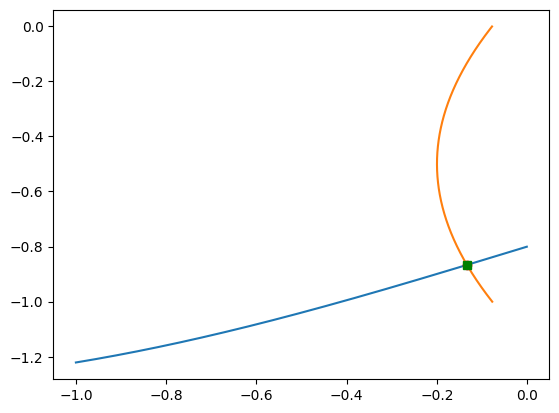

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(arr1, arr2, 0.001)
y1=[]
y2=[]
dx=0
dy=0
fi=10000
for i in x:
    y1.append(ff(i))
    y2.append(gg(i))
for i in enumerate(x):
    for j in enumerate(x):
        if (y1[i[0]] - j[1]) ** 2 + (y2[j[0]] - i[1]) ** 2  < fi:
            fi = (y1[i[0]] - j[1]) ** 2 + (y2[j[0]] - i[1]) ** 2
            dx = i[1]
            dy = y1[i[0]]
plt.plot(x, y1, y2, x, x_new, y_new, "ro", x_simp, y_simp,"gs", x_grad, y_grad, )
plt.show()